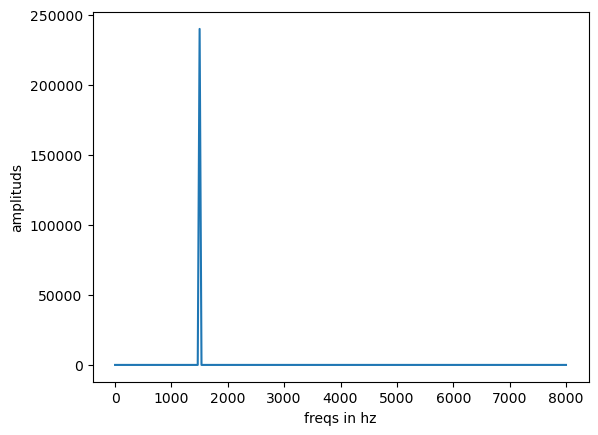

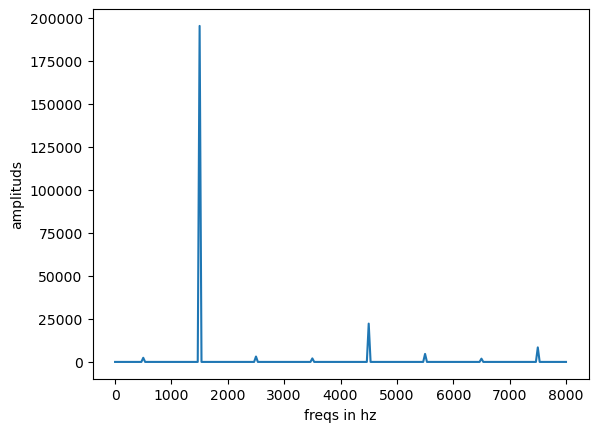

In [8]:
# DFT analyse task
#
# 	1) generate sinusoidal and periodic triangular signals of various frequencies, and analyse amplitude spectrum
#
# 	2) pronounce any vowel sound(s) and record your voice, convert recording to 16 bit wav, and
# 	analyse spectrum of your voice (find main frequencies of your voice)
#
# below you can see the implementation of sinusoidal signal

import numpy as np
import scipy.io.wavfile as wavfile
import time
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
# from matplotlib.mlab import bivariate_normal
import glob
import scipy.signal as signal


def write_audio(path, sr, data):
    # path: the path of output file,
    # sr: sampling rate
    # data: the audio waveform data
    data = data.astype('int16')
    wavfile.write(path, sr, data)
    return None

#--------generating signal ------------------------------------
def gen_sinusoid(freq, duration, sample_rate):
    N = duration * sample_rate
    t_samples = np.arange(N)
    omega = 2 * np.pi * freq / sample_rate # angular frequency 
    sinusoid = amplitude * np.sin(omega * t_samples) # sinusoidal signal
    return sinusoid

def gen_triangular(freq, duration, sample_rate, amplitude):
    N = duration * sample_rate
    t_samples = np.arange(N)
    omega = 2 * np.pi * freq / sample_rate # angular frequency 
    triangular = amplitude*signal.sawtooth(omega * t_samples, width=0.5)
    return triangular

#-------------- visualising amplitude spectrum -----------------
def plot_ampl_spectr(data, sr, db_scale=False, epsilon=1e-3):
    # data: input fragment of real signal 
    # sr: sampling rate of signal
    N = len(data)
    coef_no = int(N / 2) + 1 # coefficients number according to all frequencies
    delta_freq = sr / N # frequency resolution of according N len DFT basis frequencies
    # delta_freq = delta_omega / (2*pi) * sr = sr / N, where delta_omega = 2 * pi / N
    freqs = np.arange(coef_no) * delta_freq 
    coefs = np.fft.rfft(data)
    amplitude_spectr = np.abs(coefs)
    amplitude_spectr_db = 10 * np.log10(amplitude_spectr + epsilon)
    if db_scale:
        plt.plot(freqs, amplitude_spectr_db)
    else:
        plt.plot(freqs, amplitude_spectr)
    plt.xlabel('freqs in hz')
    plt.ylabel('amplituds')
    plt.show()
    return None

if __name__ == '__main__':
    # some experiments
    #--------- parameters -----------------------------------------
    file_name = 'sinusoid.wav'
    sample_rate = 16000 # hz
    freq = 1500 # hz
    amplitude = 1000
    duration = 0.03 # secs
    # generating some signals
    sinusoid = gen_sinusoid(freq, duration, sample_rate)
    triangle = gen_triangular(freq, duration, sample_rate, amplitude)
    
    # writing signal as audio
    write_audio(file_name, sample_rate, sinusoid)
    
    # plotting amplitude spectrum, here you can manipulate signal, db_scale of y in plot etc. 
    plot_ampl_spectr(sinusoid, sample_rate, db_scale=False)
    plot_ampl_spectr(triangle, sample_rate, db_scale=False)